## Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


## Juntando os arquivos

In [2]:
# criando coluna identificadora
loja["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

# unindo as bases
df_total = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# movendo a coluna “Loja” para ser a primeira da tabela
cols = ["Loja"] + [col for col in df_total.columns if col != "Loja"]
df_total = df_total[cols]

df_total.head()

,Loja,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Loja 1,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Loja 1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Loja 1,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Loja 1,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Loja 1,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [3]:
# conhecendo os campos do DataFrame
df_total.columns

Index(['Loja', 'Produto', 'Categoria do Produto', 'Preço', 'Frete',
       'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')

#1. Análise do faturamento



In [4]:
# somando os dados da coluna Preço de cada uma das lojas para estimar o faturamento total
faturamento_por_loja = (df_total.groupby("Loja")["Preço"].sum().reset_index().rename(columns={"Preço": "Faturamento"}))

faturamento_por_loja

,Loja,Faturamento
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


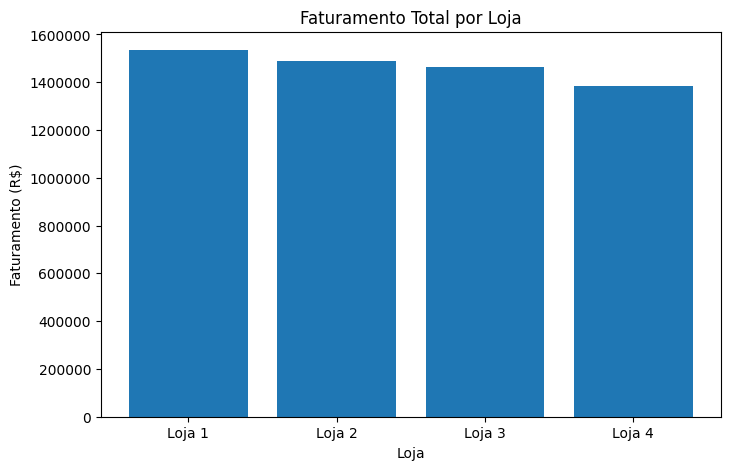

In [5]:
# gráfico de barras do faturamento por loja
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(faturamento_por_loja["Loja"], faturamento_por_loja["Faturamento"])

plt.title("Faturamento Total por Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=0) # ajusta a posição do texto do eixo x

plt.ticklabel_format(style='plain', axis='y')  # remove notação científica

plt.show()

In [6]:
# conferindo ticket médio por loja
ticket_medio = (df_total.groupby("Loja")["Preço"].mean().reset_index(name="Ticket Médio"))

ticket_medio

,Loja,Ticket Médio
0,Loja 1,650.491361
1,Loja 2,630.970352
2,Loja 3,620.612560
3,Loja 4,587.149101


In [7]:
# analisando o faturamento por ano
# convertendo a coluna de data para datetime
df_total["Data da Compra"] = pd.to_datetime(df_total["Data da Compra"], format="%d/%m/%Y")
# criando coluna com o ano da compra
df_total["Ano"] = df_total["Data da Compra"].dt.year
# criando a coluna de faturamento do ano
df_total["Faturamento"] = df_total["Preço"]
# calculando o faturamento por ano e por loja
faturamento_ano_loja = (df_total.groupby(["Ano", "Loja"])["Faturamento"].sum().reset_index().sort_values(["Ano", "Loja"]))

faturamento_ano_loja

,Ano,Loja,Faturamento
0,2020,Loja 1,491911.51
1,2020,Loja 2,427288.25
2,2020,Loja 3,428943.09
3,2020,Loja 4,441129.52
4,2021,Loja 1,482829.91
5,2021,Loja 2,468288.89
6,2021,Loja 3,483938.91
7,2021,Loja 4,463763.27
8,2022,Loja 1,422086.24
9,2022,Loja 2,477635.56


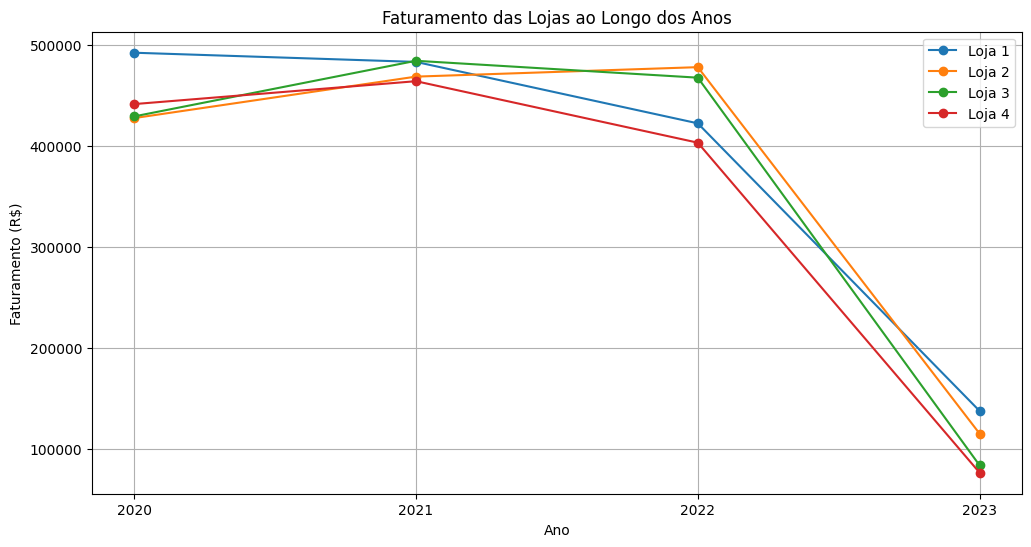

In [8]:
plt.figure(figsize=(12,6))

for loja in faturamento_ano_loja["Loja"].unique():
    dados = faturamento_ano_loja[faturamento_ano_loja["Loja"] == loja]
    plt.plot(dados["Ano"], dados["Faturamento"], marker="o", label=loja)

plt.title("Faturamento das Lojas ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Faturamento (R$)")
plt.legend()
plt.grid(True)

# <<< ajustar eixo X para não mostrar .5 >>>
plt.xticks(sorted(faturamento_ano_loja["Ano"].unique()))

plt.show()

# 2. Vendas por Categoria

In [9]:
# quantidade de produtos vendidos por categoria nas 4 lojas
vendas_por_categoria = (df_total.groupby(["Loja", "Categoria do Produto"])["Produto"].count().reset_index().rename(columns={"Produto": "Vendas por Categoria"}))

vendas_por_categoria

,Loja,Categoria do Produto,Vendas por Categoria
0,Loja 1,brinquedos,324
1,Loja 1,eletrodomesticos,312
2,Loja 1,eletronicos,448
3,Loja 1,esporte e lazer,284
4,Loja 1,instrumentos musicais,182
5,Loja 1,livros,173
6,Loja 1,moveis,465
7,Loja 1,utilidades domesticas,171
8,Loja 2,brinquedos,313
9,Loja 2,eletrodomesticos,305


In [10]:
# categoria mais vendida no total geral
vendas_totais_categorias = (df_total.groupby("Categoria do Produto")["Produto"].count().reset_index().rename(columns={"Produto": "Total de Vendas"}).sort_values("Total de Vendas", ascending=False))

vendas_totais_categorias.head()

,Categoria do Produto,Total de Vendas
6,moveis,1886
2,eletronicos,1772
0,brinquedos,1290
1,eletrodomesticos,1149
3,esporte e lazer,1113


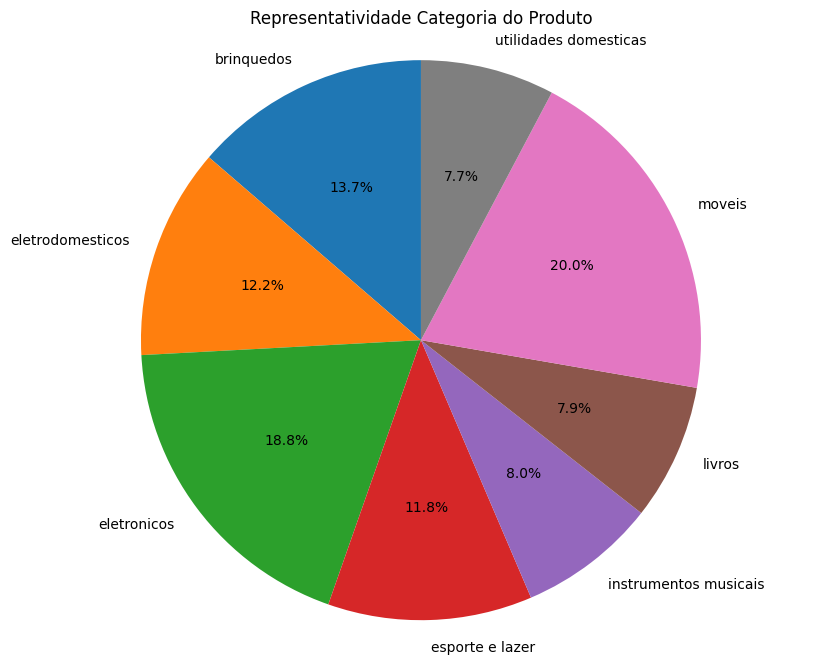

In [11]:
# gráfico de pizza com a representatividade das categorias vendidas nas 4 lojas
import matplotlib.pyplot as plt

# atribuindo a uma variável
vendas_totais_categoria = (vendas_por_categoria.groupby("Categoria do Produto")["Vendas por Categoria"].sum())

# criando o gráfico
plt.figure(figsize=(10, 8))
plt.pie(vendas_totais_categoria,labels=vendas_totais_categoria.index,autopct='%1.1f%%',startangle=90)
plt.title("Representatividade Categoria do Produto")
plt.axis('equal')  # deixa o círculo perfeito
plt.show()

In [12]:
# categoria mais vendida em cada loja
categoria_mais_vendida_por_loja = (vendas_por_categoria.sort_values(["Loja", "Vendas por Categoria"], ascending=[True, False]).groupby("Loja").first().reset_index())

categoria_mais_vendida_por_loja

,Loja,Categoria do Produto,Vendas por Categoria
0,Loja 1,moveis,465
1,Loja 2,moveis,442
2,Loja 3,moveis,499
3,Loja 4,moveis,480


In [13]:
# reaproveitando a variável para obter o total de venda por loja
total_vendas_por_loja = (vendas_por_categoria.groupby("Loja")["Vendas por Categoria"].sum().reset_index().rename(columns={"Vendas por Categoria": "Total de Produtos Vendidos"}))

total_vendas_por_loja

,Loja,Total de Produtos Vendidos
0,Loja 1,2359
1,Loja 2,2359
2,Loja 3,2359
3,Loja 4,2358


In [14]:
# consultando o ticket médio por categoria e por loja
ticket_medio_categoria = (df_total.groupby(["Loja", "Categoria do Produto"])["Preço"].mean().reset_index(name="Ticket Médio"))

ticket_medio_categoria

,Loja,Categoria do Produto,Ticket Médio
0,Loja 1,brinquedos,74.054877
1,Loja 1,eletrodomesticos,1554.209487
2,Loja 1,eletronicos,1278.257210
3,Loja 1,esporte e lazer,184.463204
4,Loja 1,instrumentos musicais,668.855440
5,Loja 1,livros,67.710520
6,Loja 1,moveis,538.017441
7,Loja 1,utilidades domesticas,99.014503
8,Loja 2,brinquedos,67.930383
9,Loja 2,eletrodomesticos,1523.797148


In [15]:
# ticket médio na categoria mais vendida
ticket_moveis = ticket_medio_categoria[ticket_medio_categoria["Categoria do Produto"] == "moveis"]

ticket_moveis

,Loja,Categoria do Produto,Ticket Médio
6,Loja 1,moveis,538.017441
14,Loja 2,moveis,532.205158
22,Loja 3,moveis,537.265651
30,Loja 4,moveis,534.803437


In [16]:
# ticket médio na segunda categoria mais vendida
ticket_eletronicos = ticket_medio_categoria[ticket_medio_categoria["Categoria do Produto"] == "eletronicos"]

ticket_eletronicos

,Loja,Categoria do Produto,Ticket Médio
2,Loja 1,eletronicos,1278.257210
10,Loja 2,eletronicos,1298.041967
18,Loja 3,eletronicos,1214.412239
26,Loja 4,eletronicos,1210.569534


# 3. Média de Avaliação das Lojas


In [17]:
# verificando modelo de avaliação
df_total['Avaliação da compra'].unique()

array([4, 1, 5, 3, 2])

In [18]:
# calcula a média de avaliação por loja
media_avaliacao = (df_total.groupby("Loja")["Avaliação da compra"].mean().round(2).to_dict())

media_avaliacao

{'Loja 1': 3.98, 'Loja 2': 4.04, 'Loja 3': 4.05, 'Loja 4': 4.0}

# 4. Produtos Mais e Menos Vendidos

In [19]:
# quantidade vendida por produto em cada loja
vendas_por_produto = df_total.groupby(["Loja", "Produto"]).size().reset_index(name="Quantidade de Vendas")

# produto mais vendido por loja
produto_mais_vendido = vendas_por_produto.loc[vendas_por_produto.groupby("Loja")["Quantidade de Vendas"].idxmax()].reset_index(drop=True)

produto_mais_vendido

,Loja,Produto,Quantidade de Vendas
0,Loja 1,Guarda roupas,60
1,Loja 2,Iniciando em programação,65
2,Loja 3,Kit banquetas,57
3,Loja 4,Cama box,62


In [20]:
# produto menos vendido por loja
produto_menos_vendido = vendas_por_produto.loc[vendas_por_produto.groupby("Loja")["Quantidade de Vendas"].idxmin()].reset_index(drop=True)

produto_menos_vendido

,Loja,Produto,Quantidade de Vendas
0,Loja 1,Celular ABXY,33
1,Loja 2,Jogo de tabuleiro,32
2,Loja 3,Blocos de montar,35
3,Loja 4,Guitarra,33


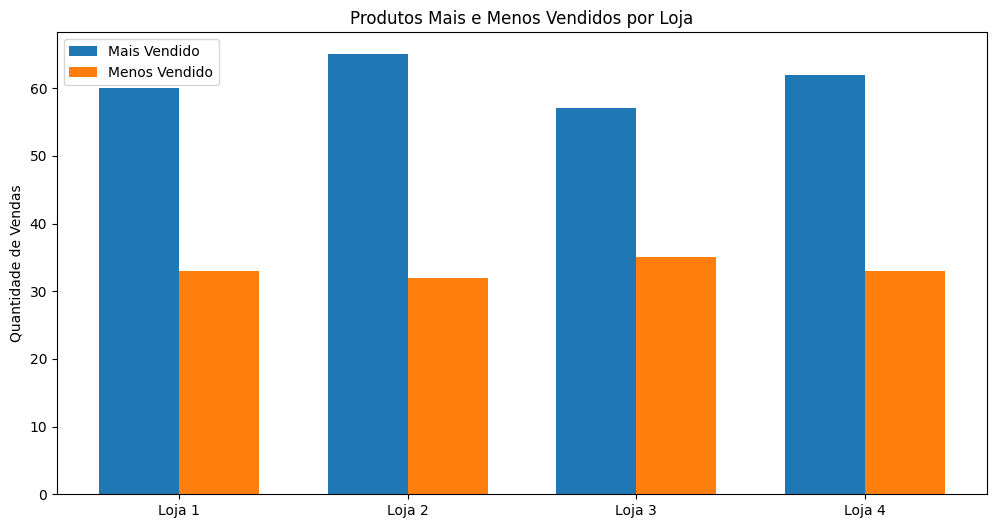

In [21]:
# construindo gráfico de barras agrupadas
import matplotlib.pyplot as plt
import numpy as np

# junta as informações em um único DataFrame
comparativo = produto_mais_vendido.merge(produto_menos_vendido,on="Loja",suffixes=("_Mais", "_Menos"))

# renomeando colunas para facilitar o gráfico
comparativo = comparativo.rename(columns={"Produto_Mais": "Produto Mais Vendido","Quantidade de Vendas_Mais": "Vendas Mais","Produto_Menos": "Produto Menos Vendido","Quantidade de Vendas_Menos": "Vendas Menos"})

# criando o gráfico
plt.figure(figsize=(12, 6))

# eixo x (posições das lojas)
x = np.arange(len(comparativo["Loja"]))

# largura das barras
width = 0.35

# barras
plt.bar(x - width/2, comparativo["Vendas Mais"], width, label="Mais Vendido")
plt.bar(x + width/2, comparativo["Vendas Menos"], width, label="Menos Vendido")

# rótulos
plt.xticks(x, comparativo["Loja"])
plt.ylabel("Quantidade de Vendas")
plt.title("Produtos Mais e Menos Vendidos por Loja")
plt.legend()

# Exibindo o gráfico
plt.show()

# 5. Frete Médio por Loja

In [22]:
custo_medio_frete = (df_total.groupby("Loja")["Frete"].mean().round(2).to_dict())

custo_medio_frete

{'Loja 1': 34.69, 'Loja 2': 33.62, 'Loja 3': 33.07, 'Loja 4': 31.28}

# 6. Relatório

##Introdução
O objetivo deste relatório é avaliar o desempenho financeiro e operacional das quatro lojas do Senhor João a partir da análise dos dados fornecidos. A intenção é identificar qual loja apresenta o menor desempenho geral e, portanto, deve ser considerada para venda.

A análise foi realizada com base em cinco pilares principais:

* Faturamento total

* Vendas por categoria

* Produtos mais e menos vendidos

* Média das avaliações dos clientes

* Custo médio do frete

Os dados foram consolidados, tratados e explorados em um ambiente Python (Google Colab), utilizando bibliotecas Pandas, Numpy e Matplotlib.

## 6.1. Faturamento Total por Loja

Para estimar o faturamento total foi calculado o preço total de cada uma das lojas.

Com base nisso pode-se constatar que a Loja 1 desempenhou melhor que as demais, sendo a Loja 4 com menor faturamento.

Também foi analisado o ticket médio de cada unidade para entender quanto o cliente gasta em média em cada loja. O calculo é feito pelo faturamento total divido pela quantidade de vendas.

A partir disso, é visto que a Loja 1 tem o maior ticket médio e a Loja 4 o menor. Esse é um dado importante pois permite avaliar a rentabilidade do négocio e verificar a estratégia de vendas.

In [23]:
faturamento_por_loja

,Loja,Faturamento
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


In [24]:
ticket_medio

,Loja,Ticket Médio
0,Loja 1,650.491361
1,Loja 2,630.970352
2,Loja 3,620.612560
3,Loja 4,587.149101


Além disso foi analisado o faturamento por ano para compreender a performance das lojas em cada periodo. Com base nos dados compartilhados entre 2020 a 2023, as lojas 1 e 4 tinham grande competitividade até o meio de 2021. Após isso a Loja 4 sofreu grande perca de market share sendo a unidade com menor valor de mercado.

Outro fato curioso é que todas as lojas despencaram as vendas de 2022 em diante.

##6.2. Vendas por Categoria

A análise das categorias revelou quais tipos de produtos tem maior aceitação em cada loja, bem como as categorias com baixo giro.

Esse indicador ajuda a entender:

* Força comercial (produtos mais populares)

* Perda de oportunidade (categorias com pouca saída)

* Risco de estoque parado

Com base na listagem de categorias é visto que a empresa comercializa produtos diversos, desde utensilios para casa até itens de esporte e lazer.

In [25]:
df_total['Categoria do Produto'].unique()

array(['eletronicos', 'moveis', 'brinquedos', 'eletrodomesticos',
       'utilidades domesticas', 'esporte e lazer', 'livros',
       'instrumentos musicais'], dtype=object)

Tendo isso em vista, foi analisado qual categoria é a mais vendida e foi possivel destacar que móveis representa 20% de todas as vendas da companhia. Essa categoria é a mais vendida em todas as 4 lojas de João, vindo em seguida eletrônicos (18,8%), brinquedos (13,7%), eletrodomésticos (12,2%) e esporte e lazer (11,8%).

In [26]:
vendas_totais_categorias

,Categoria do Produto,Total de Vendas
6,moveis,1886
2,eletronicos,1772
0,brinquedos,1290
1,eletrodomesticos,1149
3,esporte e lazer,1113
4,instrumentos musicais,753
5,livros,742
7,utilidades domesticas,730


In [27]:
categoria_mais_vendida_por_loja

,Loja,Categoria do Produto,Vendas por Categoria
0,Loja 1,moveis,465
1,Loja 2,moveis,442
2,Loja 3,moveis,499
3,Loja 4,moveis,480


Vale se atentar também quanto cada loja vendeu no total durante o periodo analisado. Com base nos números, a Loja 4 entrou em evidência mais uma vez sendo a única com 2.358 vendas e as demais com 2.359.

In [28]:
total_vendas_por_loja

,Loja,Total de Produtos Vendidos
0,Loja 1,2359
1,Loja 2,2359
2,Loja 3,2359
3,Loja 4,2358


##6.3. Média de Avaliação por Loja

As avaliações recebidas pelos clientes é fundamental para a compreensão da imagem da empresa para o público e o mercado. Por isso, nas lojas do Senhor João existe um sistema de avaliação que vai de 1 a 5, sendo 1 muito ruim e 5 muito bom.
Para analisar o desempenho de cada loja nesse indicador, foi calculado uma média de avaliação sob cada unidade e os dados foram armazenados em um dicionário.

In [29]:
media_avaliacao

{'Loja 1': 3.98, 'Loja 2': 4.04, 'Loja 3': 4.05, 'Loja 4': 4.0}

Com base nas avaliações, é visto que as lojas tem boa reputação frente as outras e que os clientes no geral ficam satisfeitos após adquirir seus produtos.
Esse é um fator importante, pois indica:

* Satisfação do cliente

* Qualidade do atendimento

* Probabilidade de recompra

* Reputação da loja no longo prazo

Uma loja com avaliação inferior a 3,5 por exemplo, tende a apresentar problemas estruturais de atendimento que podem comprometer vendas futuras.

##6.4. Produto Mais e Menos Vendido

Como visto anteriormente a categoria de produto mais vendida entre as unidades são móveis e a loja que tem maior performance nessa categoria é a Loja 3 com 499 vendas. Ao analisar os produtos, a categoria se repete com Guarda Roupa e Cama Box sendo os produtos mais vendidos das Lojas 1 e 4, respectivamente.
Já para os produtos menos vendidos brinquedos e jogos de tabuleiro estão mais presentes nas Lojas 2 e 3, e logo atrás acessórios e instrumentos musicais na Loja 4

In [30]:
produto_mais_vendido

,Loja,Produto,Quantidade de Vendas
0,Loja 1,Guarda roupas,60
1,Loja 2,Iniciando em programação,65
2,Loja 3,Kit banquetas,57
3,Loja 4,Cama box,62


In [31]:
produto_menos_vendido

,Loja,Produto,Quantidade de Vendas
0,Loja 1,Celular ABXY,33
1,Loja 2,Jogo de tabuleiro,32
2,Loja 3,Blocos de montar,35
3,Loja 4,Guitarra,33


## 6.5. Frete Médio por Loja

Por último foi visto o custo médio de frete gasto pelos consumidores em todas as unidades. Nesse indicador foi possivel observar que os clientes desembolsam de R\$31,28 a R\$34,69 com serviço de entrega, além do valor real do produto.

Esse indicador traz um ponto curioso pois a loja que mais faturou (Loja 1) é a unidade com o maior custo médio e a loja que menos faturou (Loja 4) teve o menor custo médio do frete.
Portanto, pode-se deduzir que o valor do frete não é um empecilho ou justificativa para o usuário trocar de fornecedor.

In [32]:
custo_medio_frete

{'Loja 1': 34.69, 'Loja 2': 33.62, 'Loja 3': 33.07, 'Loja 4': 31.28}

## 6.6. Conclusão

Com o conhecimento adquirido sobre cada ponto de venda do Senhor João, os indicadores que maior auxiliam para uma avaliação financeira são o Faturamento e Vendas por loja.

Foi apresentado o faturamento total de cada loja e uma visão de como foi o empenho das unidades ao longos dos anos. A partir disso vimos que a Loja 4 até 2021 perdia margem apenas para a Loja 1, após isso foi perdendo posição até 2023, sendo a loja com menor demanda.

Ao conferir o ticket médio das lojas, a Loja 4 apareceu novamente com o menor número, mostrando mais uma vez a dificuldade em promover os produtos de categoria destaque das lojas do João.

Portanto podemos afirmar que mesmo as unidades tendo quantidade de vendas muito próximas e as avaliações serem boas, cada uma tem uma tabela de preços e o motivo pode estar relacionado a oferta e demanda da região e competitivade de mercado.

Em suma, dentre as lojas do Senhor João a Loja 4 deve ser a escolhida para a venda devido menor performance comparada as outras.